# Исследование стартапов

- Автор: Ирина Севостьянова
- Дата: 09/06/2025

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ исторических данных с целью разработки модели бизнеса по перепродажи перспективных стартапов
    
**Задачи:** 
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
- изучить данные более детально;
- изучить взаимосвязи данных с друг другом.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Для анализа поступили исторические данные о стратапах. Данные состоят из осоновных 5 датасетов и 2 дополнительных.
Основные таблицы:
- `datasets/acquisition.csv` - cодержит информацию о покупках одними компаниями других компаний.
- `datasets/company_and_rounds.csv` - cодержит информацию о компаниях и раундах финансирования.
- `datasets/people.csv` - cодержит информацию о сотрудниках.
- `datasets/education.csv` - cодержит информацию об образовании сотрудника.
- `datasets/degrees.csv` - cодержит информацию о типе образования сотрудника.

Описание датасета `datasets/acquisition.csv`

- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.


Описание датасета `datasets/company_and_rounds.csv`:
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

Описание датасета `datasets/people.csv`:
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

Описание датасета `datasets/education.csv`
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

Описание датасета `datasets/degrees.csv`
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.

Дополнительные таблицы:
- `datasets/fund.csv` - содержит информацию о фондах.
- `datasets/investment.csv` - cодержит информацию о раундах инвестирования.

Описание датасета `datasets/fund.csv`:
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

Описание датасета `datasets/investment.csv`:
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

## 1. Загрузка данных и знакомство с ними

- Загрузим данные о рынке стартапов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в следующих переменных: `acq_df`,`company_and_rounds_df`, `people_df`, `edu_df`, `degr_df`

In [1]:
# Установим библиотеку phik
!pip install phik

# Установим библиотеку venn
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3

# Установим библиотеку jupyter-black
!pip install jupyter-black

In [2]:
# Импортируем библиотеку pandas
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns


# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Загружаем библиотеку для дополнительной красоты кода
import jupyter_black



In [3]:
# Выгружаем данные в переменные
acq_df=pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

company_and_rounds_df=pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

people_df=pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

edu_df=pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

degr_df=pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

Познакомимся с типами данных и изучим общую информацию о них. Выведем первые строки методом head(), а информацию о датафрейме методом info(). 

(1) Начнем с датасета `acquisition.csv`.

In [4]:
# Выведем общую информацию
acq_df.info()

# Выведем первые 3 строки датасета
acq_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01


Датасет `acq_df` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов соответсвуют общепринятым правилам по написанию солбцов в формате snakecase.

**Типы данных**
- Данные содержат числовые значения, которые хранятся в типе данных `int64`. Значения в столбцax `id`, `acquiring_company_id`, `acquired_company_id`, `price_amount` представлено целыми числами, что является корректным только для столбца с суммой сделки `price_amount`. Для столбца `term_code` представлен корректно, а для `acquired_at`, которые содержит информацию о дате сделки необходимо преобразовать с `object` в тип данных `datetime64` для корректной работы с датами. 

- Для значений с `id`, `acquiring_company_id`, `acquired_company_id` наиболее оптимальным будет выполнить преобразование с типа данных `int64` на `object` смцелью оптимизации, так как данные значения не будут применятся для рассчетов или анализа как числа.

**Пропущенные значения**
- Пропуски содержатся в двух столбцах: `term_code`, `acquired_at`. Можно предположить что пропуски в столбце `acquired_at` не случайны и означают, что сделка еще не закрыта. 

- Значительное количество пропуском содержится в столбце `term_code`. Это может быть связано с ошибками ввода данных, указание порядка оплаты было необязательным параметром для всех сделок либо связано с конфиденциальностью данных.
Следует дополнительно проверить данные предположения.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

(2) Выведем информацию о датасете `company_and_rounds.csv`

In [5]:
# Выведем общую информацию
company_and_rounds_df.info()

# Выведем первые 3 строки датасета
company_and_rounds_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0


Датасет `company_and_rounds_df` содержит 22 столбца и 217774 строк, в которых представлена информация о компаниях и раундах финансирования.

После первичного анализа данных можно сделать следующие выводы:

Названия столбцов содержат пробелы между слова, что может создат проблемы при обращении к ним при анализе данных и привести к ошибке. Стандартизируем названия столбцов, приведем к формату snakecase, заменив пробелы на нижнее подчеркиваение и приведем к нижнему регистру. Стоит также отметить столбцы с информацией об идентификатор компании с одинаковыми названиями в различном формате написания, что также может привести к неодноднозначного результату при обращении к ним: `company  ID`, `company  id`. Можно провести дополнительную сверку значений, если данные полностью совпадают, то следует удалить один из столбцов. К тому же `company  id` имеет большое количество пропущенных значений.

**Типы данных**

Данные представлены двумя типами данных `float64` и `object`. Вещественными типов данных `float64`представлены следующие столбцы: 
`company  ID`, 
`investment  rounds`,    
`funding  rounds`,       
`funding  total`, 
`milestones`,            
`funding  round  id`,    
`company  id`.
Для столбца, которые содержит информацию о сумме финансирования `funding total`. Для вышепредставленных столбцов таких как `investment  rounds`,`investment  rounds`,`milestones` следует тип данных заменить на int64, так как содержат целочисленное значение, но пока оставим как есть для более детальной проработки данных. Для столбцов со значениями идентификаторов `company  ID`,`funding  round  id`, `company  id`стоит заменить на тип данных `object`, но посмотрим как данные значения представлены в других датасетах. 

С типом данных `object` представлены следующие столбцы:
`name`,                   
`category  code`,          
`status`,                 
`founded  at`,             
`closed  at`,            
`domain`,                
`network  username`,     
`country  code`, 
`funded  at`,      
`funding  round  type`.
Тип данных столбцов `founded  at`, `funded  at` необходимо заменить на `datetime64` для корректной работы с датами. Остальные столбцы соответствуют представленному типу данных.

**Пропущенные значения**

Пропуски содержатся во всех столбцах датасета. Так как для анализа собраны исторические данные, можно предположить, что не всем сделка есть информация о компаниях и раундах финансирования.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

(3) Выведем информацию о датасете `people.csv`

In [6]:
# Выведем общую информацию
people_df.info()

# Выведем первые 3 строки датасета
people_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN


Датасет `people_df` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках

После первичного анализа данных можно сделать следующие выводы:

Названия столбцов соответсвуют общепринятым правилам по написанию солбцов в формате snakecase.

**Типы данных**

Числовым типом данных `float64` представлен столбец `company_id` в типе `float64` и `id` в типе `int64`, наиболее оптимальным будет преобразовать эти столбцы в тип данных `object`.

С типом данных `object` представлены следующие столбцы: `first_name` , `last_name`, `network_username`. Для данных стобцов тип определен верно.

**Пропущенные значения**

Пропуски содержатся во всех столбцах датасета, кроме столбца с идентификатор сотрудника, можно предположить, что это первичный ключ таблицы. В остальных столбцах содержатся пропуски, например, характер пропусков столбца `network_username` может быть связан с тем, что сотрудник не зарегистрирован в социальных сетях, так как значения столбца содержат ник. Пропуски в столбце `company_id`,возможно, связаны с тем, что информация о компании для некоторых сотрудников просто не была внесена в систему либо сотрудники были наняты через сторонние агентства или работают на условиях фриланса или менялась структура данных и старые записи могут оказаться без актуальных `company_id`.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

(4) Выведем информацию о датасете `education.csv`

In [7]:
# Выведем общую информацию
edu_df.info()

# Выведем первые 3 строки датасета
edu_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01


Датасет `edu_df` содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудника.

После первичного анализа данных можно сделать следующие выводы:

Названия столбцов соответсвуют общепринятым правилам по написанию солбцов в формате snakecase.

**Типы данных**

Целочисленныс типом данных `int64` представлены столбцы `id` и `person_id`. Поступим также как и в предыдущих датасетах, преобразуем в тип данных `object`.

С типом данных `object` представлены столбцы `instituition` и `graduated_at`, в данном случае проведем замену только для `graduated_at`, так как столбец содержит информацию о дате получения образования, преобразуем в тип данных даты и времени.

**Пропущенные значения**

Пропуски содержатся во всех столбцах `instituition` и `graduated_at`. Они могут быть связаны с ошибкой ввода данных, данные могли быть введны некорректно, не верно указано число, опечатка или сотрудник еще не завершил процесс обучения в учебном заведении.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

(5) Выведем информацию о датасете `degrees.csv`

In [8]:
# Выведем общую информацию
degr_df.info()

# Выведем первые 3 строки датасета
degr_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication


Датасет `degr_df` содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудника.

После первичного анализа данных можно сделать следующие выводы:

Названия столбцов соответсвуют общепринятым правилам по написанию солбцов в формате snakecase.

**Типы данных**

Большинство столбцов представлены типом данных `object`, что корректно. Для столбца `id` с типом данных `int64` оптимальным будет преобразовать в тип данных `object`, но в рамках данного анализа не будем этого делать, так как при необходимости объединить датасеты воспользуемся столбцом `object_id`, которые содержит информацию об идентификаторе сотрудника. Но стоит обратить внимание, что значения столбца содержат лишний символ `р:` и необходимо провести нормализацию значений перед возможным объдинением. Это может быть свзано с тем, что данные собирались из разных источников в разное время и правила формирвоания индентификаторов также были различны.


**Пропущенные значения**

Пропуски содержатся в столбцах `degree_type` и `subject`. Возможную причину возникновения можно объяснить тем, что информация о типе образования была не обязательная для заполнения либо с внутренней политикой компании.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### 1.2. Смена типов и анализ пропусков

- Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

Обработаем тип данных в столбцах, которые хранят значения дат и времени. По предварительному анализу это были следующие датасеты и столбцы:


- (1) датасет `acq_df`: столбец `acquired_at`
- (2) датасет `company_and_rounds_df`: столбец `founded_at`, `funded_at`
- (3) датасет `edu_df`: столбец `graduated_at`

(1) Перед преобразованием посмотрим на уникальные значения в столбце `acquired_at` и попробуем найти причины некорректных типов.

In [9]:
acq_df['acquired_at'].nunique()
acq_df['acquired_at'].unique()

array(['2007-05-30', '2007-07-01', '2007-05-01', ..., '2013-12-11',
       '2013-08-31', '2013-12-12'], dtype=object)

In [10]:
# Преобразуем тип данных столбца acquired_at датасета acq_df в datetime64, заменив пропуски на значение-индикатор
acq_df['acquired_at'] = pd.to_datetime(acq_df['acquired_at'], errors='coerce')

# Проверим результат преобразования
acq_df['acquired_at'].dtypes
acq_df['acquired_at'].head(4)

0   2007-05-30
1   2007-07-01
2   2007-05-01
3   2007-06-01
Name: acquired_at, dtype: datetime64[ns]

In [11]:
# Сделаем дополнительную проверку
min_year = acq_df['acquired_at'].min()
max_year = acq_df['acquired_at'].max()
display(f'Первый год оформления сделки: {min_year}')
display(f'Последний год оформления сделки: {max_year}')

'Первый год оформления сделки: 1966-03-24 00:00:00'

'Последний год оформления сделки: 2013-12-12 00:00:00'

Исторические данные о покупках одними компаниями других компаний представлены за 47 лет.

(2) Перед преобразованием посмотрим на уникальные значения датасета `company_and_rounds_df` в столбцax `founded  at`, `funded  at` и попробуем найти причины некорректных типов. Но перед этим выполним нормализацию столбцов. Между словами названия столбцов содержится двойной пробел, уберем его и заменим на '_'

In [12]:
# Выводим названия всех столбцов датасета
company_and_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

До нормализации наименования столбцов проверим столбцы со схожими названиями `company  ID` и `company  id` и переменуем один из них.

In [13]:
company_and_rounds_df=company_and_rounds_df.rename(columns={'company  ID':'id'})
company_and_rounds_df['id']

0           1.0
1           1.0
2           1.0
3          10.0
4         100.0
          ...  
217769      NaN
217770      NaN
217771      NaN
217772      NaN
217773      NaN
Name: id, Length: 217774, dtype: float64

In [14]:
# Приводим наименование столбцов к snakecase
company_and_rounds_df.columns = [x.lower().replace('  ', '_') 
                      for x in company_and_rounds_df.columns.values]
company_and_rounds_df.columns

Index(['id', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
       'domain', 'network_username', 'country_code', 'investment_rounds',
       'funding_rounds', 'funding_total', 'milestones', 'funding_round_id',
       'company_id', 'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round'],
      dtype='object')

In [15]:
# Выведем уникальные значения
found_u=company_and_rounds_df['founded_at'].unique()
fund_u=company_and_rounds_df['funded_at'].unique()

# Посчитаем количество уникальных значений
found_nu=company_and_rounds_df['founded_at'].nunique()
fund_nu=company_and_rounds_df['funded_at'].nunique()

display(f'Уникальные значения столбца founded_at: {found_u}')
display(f'Количество уникальных значений: {found_nu}')

display(f'Уникальные значения столбца funded_at: {fund_u}')
display(f'Количество уникальных значений: {fund_nu}')

"Уникальные значения столбца founded_at: ['2005-10-17' nan '2008-07-26' ... '1996-02-15' '1962-06-05' '1988-05-13']"

'Количество уникальных значений: 6156'

"Уникальные значения столбца funded_at: ['2005-10-01' '2007-01-01' '2008-05-19' ... '2004-05-06' '2001-09-09'\n '2003-03-05']"

'Количество уникальных значений: 3399'

Возможно ошибка в представлении типа данных возникла из-за того, что в столбце `founded_at` и `funded_at` присутствуют значения, которые интерпретируются как строки.

In [16]:
# Заменив пропуски на значение-индикатор -1
company_and_rounds_df['founded_at'] = company_and_rounds_df['founded_at'].fillna(pd.NaT)
company_and_rounds_df['funded_at'] = company_and_rounds_df['funded_at'].fillna(pd.NaT)

# Преобразуем тип данных столбцов founded_at и funded_at в datetime64
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'], errors='coerce')
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], errors='coerce')


# Проверим результат преобразования
company_and_rounds_df[['founded_at', 'funded_at']].head(3)


,founded_at,funded_at
0,2005-10-17,2005-10-01
1,2005-10-17,2007-01-01
2,2005-10-17,2008-05-19


In [17]:
# Проверим тип данных
company_and_rounds_df['founded_at'].dtypes
company_and_rounds_df['funded_at'].dtypes

dtype('<M8[ns]')

In [18]:
# Сделаем дополнительную проверку
min_found = company_and_rounds_df['founded_at'].min()
max_found = company_and_rounds_df['founded_at'].max()

min_fund = company_and_rounds_df['funded_at'].min()
max_fund = company_and_rounds_df['funded_at'].max()

display(f'Первый год инвестирования: {min_found}')
display(f'Последний год инвестирования: {max_found}')

display(f'Первый год финансирования: {min_fund}')
display(f'Последний год финансирования: {max_fund}')

'Первый год инвестирования: 1901-01-01 00:00:00'

'Последний год инвестирования: 2014-10-01 00:00:00'

'Первый год финансирования: 1960-01-01 00:00:00'

'Последний год финансирования: 2013-12-12 00:00:00'

(3) Перед преобразованием посмотрим на уникальные значения `edu_df` в столбец `graduated_at` и попробуем найти причины некорректных типов.

In [19]:
# Выведем уникальные значения
grad_u=edu_df['graduated_at'].unique()

# Посчитаем количество уникальных значений
grad_nu=edu_df['graduated_at'].nunique()

display(f'Уникальные значения столбца graduated_at: {grad_u}')
display(f'Количество уникальных значений: {grad_nu}')


"Уникальные значения столбца graduated_at: [nan '1990-01-01' '1992-01-01' '2006-01-01' '1988-01-01' '2002-01-01'\n '1997-01-01' '1989-01-01' '2008-01-01' '1993-01-01' '2007-01-01'\n '1999-01-01' '2004-01-01' '1996-01-01' '2005-01-01' '1995-01-01'\n '2000-01-01' '1998-01-01' '2003-01-01' '1994-01-01' '1986-01-01'\n '1985-01-01' '1975-01-01' '1982-01-01' '1979-01-01' '1980-01-01'\n '1984-01-01' '2001-01-01' '1976-01-01' '1978-01-01' '1970-01-01'\n '1983-01-01' '1949-01-01' '1987-01-01' '1991-01-01' '1974-01-01'\n '1981-01-01' '1977-01-01' '2009-01-01' '1965-01-01' '2011-01-01'\n '1969-01-01' '1973-01-01' '1924-01-01' '1956-01-01' '1968-01-01'\n '1967-01-01' '1972-01-01' '2013-01-01' '2010-01-01' '1964-01-01'\n '1971-01-01' '1966-01-01' '1962-01-01' '1941-01-01' '1921-01-01'\n '1920-01-01' '1963-01-01' '1961-01-01' '2012-01-01' '1955-01-01'\n '1960-01-01' '1959-01-01' '1958-01-01' '1957-01-01' '1953-01-01'\n '1954-01-01' '1929-01-01' '1952-01-01' '2015-01-01' '1933-01-01'\n '1951-01-01']"

'Количество уникальных значений: 71'

Данные могли быть могли быть интерпретированы как строки тип данных `object` при чтении данных или заранее преобразованы для удобства хранения или отображения. Также это может быть связано с тем, что формат дат не соответствует стандартным форматам, которые распознаёт Pandas, библиотека может не суметь автоматически преобразовать данные в тип даты и времени.

In [20]:
# Заменив пропуски на значение-индикатор -1
edu_df['graduated_at'] = edu_df['graduated_at'].fillna(-1)

# Преобразуем тип данных столбцов founded_at и funded_at в datetime64
edu_df['graduated_at'] = pd.to_datetime(edu_df['graduated_at'], errors='coerce')

# Проверим результат преобразования
edu_df['graduated_at'].head(5)

0   1969-12-31 23:59:59.999999999
1   1990-01-01 00:00:00.000000000
2   1992-01-01 00:00:00.000000000
3   2006-01-01 00:00:00.000000000
4   1969-12-31 23:59:59.999999999
Name: graduated_at, dtype: datetime64[ns]

Преобразуем тип данных с числового на тип данных `object` с целью оптимизации памяти и быстрой обработки данных:

- (1) датасет `acq_df`: столбцы `id`, `acquiring_company_id`, `acquired_company_id`
- (2) датасет `company_and_rounds_df`: столбцы `company_id1`, `funding_round_id`, `company_id`
- (3) датасет `people_df`: столбцы `company_id`, `id`
- (4) датасет `education`: столбцы `id` и `person_id`

(1) Выполним преобразования идентификаторов датасета `acq_df` 

In [21]:
# Преобразуем тип данных в object

acq_df['id']=acq_df['id'].astype('object')
acq_df['acquiring_company_id']=acq_df['acquiring_company_id'].astype('object')
acq_df['acquired_company_id']=acq_df['acquired_company_id'].astype('object')

# Преобразуем результат
acq_df[['id','acquiring_company_id','acquired_company_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   object
 1   acquiring_company_id  9407 non-null   object
 2   acquired_company_id   9407 non-null   object
dtypes: object(3)
memory usage: 220.6+ KB


(2) Выполним преобразования идентификаторов датасета `company_df` 

In [22]:
# Преобразуем тип данных в object

company_and_rounds_df['id']=company_and_rounds_df['id'].astype('object')
company_and_rounds_df['funding_round_id']=company_and_rounds_df['funding_round_id'].astype('object')
company_and_rounds_df['company_id']=company_and_rounds_df['company_id'].astype('object')

# Преобразуем результат
company_and_rounds_df[['id','funding_round_id','company_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                217472 non-null  object
 1   funding_round_id  52928 non-null   object
 2   company_id        52928 non-null   object
dtypes: object(3)
memory usage: 5.0+ MB


(3) Выполним преобразования идентификаторов датасета `people_df` 

In [23]:
# Преобразуем тип данных в object

people_df['id']=people_df['id'].astype('object')
people_df['company_id']=people_df['company_id'].astype('object')


# Преобразуем результат
people_df[['id','company_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          226709 non-null  object
 1   company_id  34615 non-null   object
dtypes: object(2)
memory usage: 3.5+ MB


(4) Выполним преобразования идентификаторов датасета `edu_df` 

In [24]:
# Преобразуем тип данных в object

edu_df['id']=edu_df['id'].astype('object')
edu_df['person_id']=edu_df['person_id'].astype('object')

# Преобразуем результат
edu_df[['id','person_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         109610 non-null  object
 1   person_id  109610 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


Необходимые преобразования типов данных и нормализация столбцов проведены. Теперь рассмотрим данные на полноту и оценим количество пропусков.

In [25]:
display('Количество пропусков в датасете acq_df:')
display(acq_df.isna().sum())
display('Доля пропусков в датасете acq_df:')
display(acq_df.isna().sum() / acq_df.shape[0]*100.0)

'Количество пропусков в датасете acq_df:'

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

'Доля пропусков в датасете acq_df:'

id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

В датасете обнаружено 7576 пропусков в столбце `term_code` - варианты расчёта, что составляет более 80%. Эти данные не основные для нашего исследования, поэтому оставим пропуски как есть. Также пропущенные значения содержатся в столбце `acquired_at` в количестве 29 (0,3%), что не значительно, их тоже оставим как есть.

In [26]:
display('Количество пропусков в датасете company_and_rounds_df:')
display(company_and_rounds_df.isna().sum())
display('Доля пропусков в датасете company_and_rounds_df:')
display(company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0]*100.0)

'Количество пропусков в датасете company_and_rounds_df:'

id                        302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

'Доля пропусков в датасете company_and_rounds_df:'

id                      0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id             75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

Во всех столбцах находятся пропущенные значения.  Разделим их на категории: низкий, средний и высокий процент содержания пропущенных значений. Датасет содержит информацию о компаниях и финансировании. Низкий процент пропусков (до 0.1%) содержат следующие столбцы:
- `id`, 
- `name`, 
- `status`, 
- `investment_rounds`, 
- `funding_rounds`, 
- `funding_total`, 
- `milestones`. 
Эти данные можно считать относительно надёжными для анализа.

Средний процент пропусков (от 32% до 56%) в полях `category_code`, `domain`, `country_code`, `network_username`. Здесь может потребоваться дополнительная обработка данных, например, замена пропусков на основании имеющихся данных в датасете или открытых источников.

Высокий процент пропусков (более 75%) в полях, связанных с финансированием:
- `funding_round_id`,
- `company_id`, 
- `funded_at`, 
- `funding_round_type`, 
- `raised_amount`, 
- `pre_money_valuation`, 
- `participants`, 
- `is_first_round`, 
- `is_last_round`. 

Анализ данных с таким высоким процентом пропусков может быть затруднительным, так как данные нужны для исследования. С целью заполнения недостающих данных потребуется поиск дополнительной информации.

Особое внимание стоит уделить полю `closed_at` с пропуском более 98%, так как это поле может быть критически важным для анализа статуса компаний. Пропуски в данном столбце появились не случайно, а по определенной причине (вероятнее всего относятся к типу MNAR), например, наличие пропусков можно объяснить данными, которых нет в наборе. Если столбец содержит пустую информацию о дате, значит компания действующая. Такие пропуски оставим в датасете как есть.

На данном этапе данные оставим как есть, при необходимости при дальнейшем анализе заменим числовые пропущенные значения на среднее либо на основании имеющихся данных датасета.

In [27]:
display('Количество пропусков в датасете people_df:')
display(people_df.isna().sum())
display('Доля пропусков в датасете people_df:')
display(people_df.isna().sum() / people_df.shape[0]*100.0)

'Количество пропусков в датасете people_df:'

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

'Доля пропусков в датасете people_df:'

id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

Проанализировав информацию о пропущенных значениях в датасете people_df, можно сделать следующие выводы:
Отсутствуют пропущеные значения в столбце `id`, что делает его надёжным для анализа и использования в качестве идентификатора с уникальными значениями.

Очень низкий процент пропусков (0.002% и менее) в полях `first_name` и `last_name`, что говорит о том, что данные в этих столбцах достаточны и могут быть использованы для анализа. Можно предположить, что пропуски связаны с тем, что имя или фамилия о сотруднике была не введена по причине того, например, что одно из полей было необязательно для заполнения или связано с ошибками при вводе данных.

Столбцы `company_id` и `network_username` имеют более 82% пропущенных значений. Это может затруднить анализ данных, связанных с компаниями и сетевыми учётными записями. Для дальнейшей работы с ними можно исключить поля из анализа, так как они не являются необходимыми для ислледования.

In [28]:
display('Количество пропусков в датасете edu_df:')
display(edu_df.isna().sum())
display('Доля пропусков в датасете edu_df:')
display(edu_df.isna().sum() / edu_df.shape[0]*100.0)

'Количество пропусков в датасете edu_df:'

id               0
person_id        0
instituition    55
graduated_at     0
dtype: int64

'Доля пропусков в датасете edu_df:'

id              0.000000
person_id       0.000000
instituition    0.050178
graduated_at    0.000000
dtype: float64

Отсутсвуют пропуски в столбцах `id` и `person_id`, что позволяет использовать данные столбцы в качестве уникальных идентификаторов для обращения к ним. Также незначительное количество пропусков содержится в столбце `instituition` - менее 5%. Примерно 47% пропущенных значений содержится в столбце `graduated_at`, что может затруднить анализ, связанных с датой окончания учебного заведения. Но в рамках данного исследования такая задача не стоит.

Для работы с пропусками в столбце `graduated_at` можно, например, заполнить пропуски наиболее часто встречающимися значениями, но на данном этапе оставим как есть.

#### Промежуточный вывод

Проанализировав информацию о пропущенных значениях можно сделать вывод, что большинство датасетов имеют достаточно высокий процент пропущенных значений, особенно в датасете `company_and_rounds_df`, который содержит информацию о финанисровании, такак одна из задач исследования - изучить какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой.

## 2. Предобработка данных, предварительное исследование

Создадим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

- типичный размер средств, выделяемый в рамках одного раунда;
- общее количество раундов финансирования за этот год.

In [29]:
# Преобразуем столбец в формат datetime
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'], errors='coerce')

# Создадим новый столбец с указанием года на основании данных столбца funded_at
company_and_rounds_df['years'] = company_and_rounds_df['funded_at'].dt.year

display(company_and_rounds_df['years'])

0         2005.0
1         2007.0
2         2008.0
3            NaN
4            NaN
           ...  
217769    2011.0
217770    2011.0
217771    2012.0
217772    2013.0
217773    2013.0
Name: years, Length: 217774, dtype: float64

In [30]:
# Создаём сводную таблицу
pivot_table = pd.pivot_table(company_and_rounds_df, 
                             values='raised_amount', index='years',
                             aggfunc={'raised_amount': [pd.Series.median, 'count']})
# Переименнуем столбцы
pivot_table = pivot_table.rename(columns={'count': 'total_rounds', 'median': 'median_amount'})

display(pivot_table)


,total_rounds,median_amount
years,,
1960.0,9,0.0
1973.0,1,0.0
1974.0,2,0.0
1984.0,3,41000.0
1985.0,1,0.0
1987.0,2,1250000.0
1989.0,1,15000.0
1990.0,1,1000000.0
1992.0,1,2000000.0


In [31]:
# Оставляем информацию только для тех лет, где количество раундов больше 50
pivot_table_actual_years = pivot_table[pivot_table['total_rounds'] > 50]

display(pivot_table)

,total_rounds,median_amount
years,,
1960.0,9,0.0
1973.0,1,0.0
1974.0,2,0.0
1984.0,3,41000.0
1985.0,1,0.0
1987.0,2,1250000.0
1989.0,1,15000.0
1990.0,1,1000000.0
1992.0,1,2000000.0


Построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

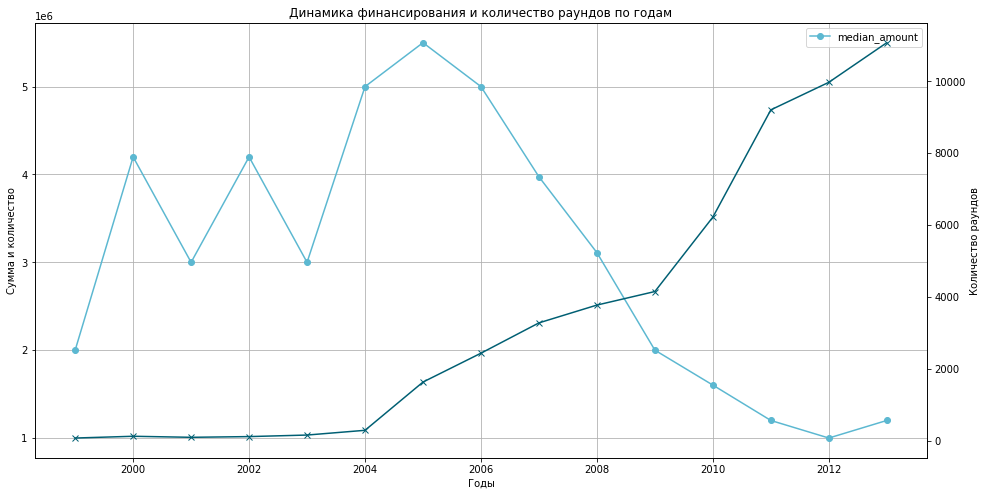

In [32]:
# Строим линейный график
pivot_table_actual_years.plot(kind='line',
                 y='median_amount', 
                 figsize=(16, 8),
                color='#5CB8D1',
                marker='o')

# Подписываем и отображаем график   
plt.title('Динамика финансирования и количество раундов по годам')
plt.xlabel('Годы')
plt.ylabel('Сумма и количество')
plt.grid(True)

ax2 = plt.twinx()
ax2.plot(
    pivot_table_actual_years.index,
    pivot_table_actual_years['total_rounds'],
    marker='x',
    color='#005F73'
)
ax2.set_ylabel('Количество раундов')

plt.show()

Как показывает график, максимальное значение типичного размера собранных средств в рамка одного раунда был выявлен в 2005 году, далее это значения ниспадает и только в 2013 году заметно тенденция на увеличение.

В 2013 году количество раундов и размер средств финансирования увеличивалось, наблюдается динамика на рост интереса к инвестициям.


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний. Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.

In [33]:
# Посмотрим на данные (количество сторок 226709)
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [34]:
# Посмотрим на данные (количество сторок 109610)
edu_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,1969-12-31 23:59:59.999999999
1,2,6136,"Washington University, St. Louis",1990-01-01 00:00:00.000000000
2,3,6136,Boston University,1992-01-01 00:00:00.000000000
3,4,6005,University of Greenwich,2006-01-01 00:00:00.000000000
4,5,5832,Rice University,1969-12-31 23:59:59.999999999


(1)Разделим все компании на несколько групп по количеству сотрудников.

In [35]:
# Посчитаем общее количество сотрудников для каждой компании
people_df['company_size'] = people_df['company_id'].value_counts()

In [36]:
# Посмотри на распределение данных
display('Статистические показатели столбца company_size:')
people_df['company_size'].describe()

'Статистические показатели столбца company_size:'

count    20405.000000
mean         1.548689
std          2.870693
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        244.000000
Name: company_size, dtype: float64

Исходя из среднего и максимального значения по количеству сотрудников, можно сделать вывод, что данные распределены неравномрено, наиболее количество значений содержится ближе к минимальному значению.

In [37]:
# Разбиваем на категории с помощью pd.cut
people_df['company_group'] = pd.cut(people_df['company_size'], bins=[0, 1, 4, 8, float('inf')], labels=['micro bisness', 'small bisness','medium bisness', 'large bisness'])

display(people_df['company_group'].head())

0              NaN
1    small bisness
2    micro bisness
3    small bisness
4    large bisness
Name: company_group, dtype: category
Categories (4, object): ['micro bisness' < 'small bisness' < 'medium bisness' < 'large bisness']

Посмотрим распределение значений на диаграмме.

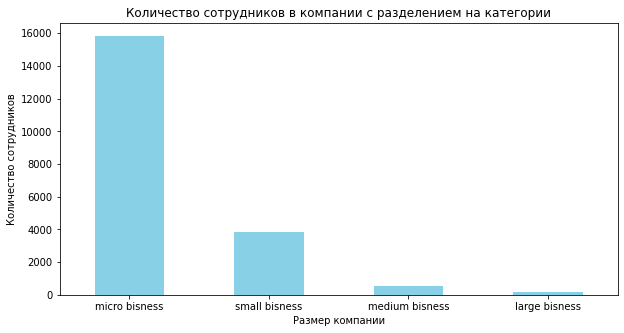

In [38]:
# Задаем размер графика
plt.figure(figsize=(10,5))

# Построим столбчатую диаграмму
people_df['company_group'].value_counts().plot(kind='bar',
                                               rot=0, 
                                               legend=False,
                                               color='#87D0E6',
                                               title=f'Количество сотрудников в компании с разделением на категории'
)

# Настраиваем оформление графика
plt.xlabel('Размер компании')
plt.ylabel('Количество сотрудников')

# Выводим график
plt.show()

Такое разделение позволяет: 

- Выделить группы с небольшим количеством сотрудников, где различия в размере компаний могут быть значимыми. 
- Учесть наличие значительного числа компаний с очень малым количеством сотрудников (что подтверждается средним значением). 
- Обеспечить достаточно широкие группы для средних и больших компаний, чтобы учесть разнообразие их размеров.

Оценим среднюю долю сотрудников без информации об образовании в каждой из групп.

In [39]:
# Объединим датасеты peolpe_df и edu_df
employee_df = people_df.merge(edu_df, left_on='id', right_on='person_id', how='left')

display(employee_df.head())


,id_x,first_name,last_name,company_id,network_username,company_size,company_group,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,NaN,NaN,2415,10,Harvard University,1969-12-31 23:59:59.999999999
1,100,Peter,Lester,27.0,NaN,2.0,small bisness,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,1.0,micro bisness,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,3.0,small bisness,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,13.0,large bisness,NaN,NaN,NaN,NaT


Для начала с помощью датасета `edu_df` создадим столбец, на основании данных столбца `instituition`, который будет содержать информацию с значениями 0 и 1, где 0 - нет информации об образовании, 1 - информация об образовании имеется.

In [40]:
# Cоздадим новый столбец, который будет содержать информацию с значениями 0 и 1
employee_df['info_education'] = employee_df['instituition'].notnull().astype(int)

display(employee_df['info_education'])

0         1
1         0
2         0
3         0
4         0
         ..
267689    0
267690    1
267691    1
267692    0
267693    0
Name: info_education, Length: 267694, dtype: int64

In [41]:
# Посмотрим на распределение значений
employee_df.groupby('company_group')['info_education'].value_counts()

company_group   info_education
micro bisness   0                 11506
                1                  6818
small bisness   0                  2875
                1                  1533
medium bisness  0                   379
                1                   214
large bisness   0                   133
                1                    75
Name: info_education, dtype: int64

In [42]:
# Оставляем информацию только о тех сотрудниках, где отсутствует информация об образовании
edu_share = employee_df.groupby('company_group')['info_education'].mean()
display(edu_share)

company_group
micro bisness     0.372080
small bisness     0.347777
medium bisness    0.360877
large bisness     0.360577
Name: info_education, dtype: float64

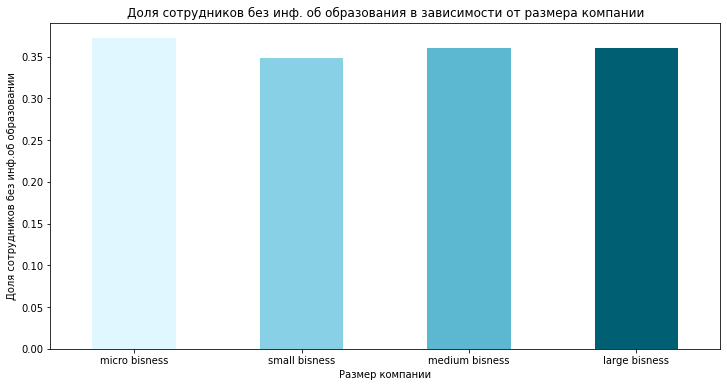

In [43]:
# Задаем размер графика
plt.figure(figsize=(12,6))

# Построим столбчатую диаграмму
edu_share.plot(kind='bar',
                                               rot=0, 
                                               legend=False, # Выключаем легенду
                                               title=f'Доля сотрудников без инф. об образования в зависимости от размера компании',
                                               color=['#E0F7FF','#87D0E6','#5CB8D1', '#005F73'] 
)

# Настраиваем оформление графика
plt.xlabel('Размер компании')
plt.ylabel('Доля сотрудников без инф.об образовании')

# Выводим график
plt.show()

На основании этих данных можно сделать вывод, что доля сотрудников без информации об образовании в разных группах компаний по размеру довольно близка и колеблется примерно в пределах от 34% до 37%. Это говорит о том, что вероятность отсутствия информации об образовании у сотрудников не сильно зависит от размера компании.

Присоединение таблицы `degrees.csv`: проверим, есть ли общие ключи для присоединения датасета `degrees.csv` к другим таблицам.

In [44]:
degr_df.head(3)

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication


In [45]:
degr_df['object_id']

0           p:6117
1           p:6136
2           p:6136
3           p:6005
4           p:5832
            ...   
109605    p:268589
109606    p:268527
109607    p:268527
109608    p:268528
109609    p:268528
Name: object_id, Length: 109610, dtype: object

Объдинение возможно, имеется общий ключ с датасетом - `id` датасета `people_df`, который содержит информацию об идентификатор сотрудника. Но перед присоединением необходимо обработать значения столбца `object_id`, исключив символы `p:`, так как он отсутствуют в других датасетах.

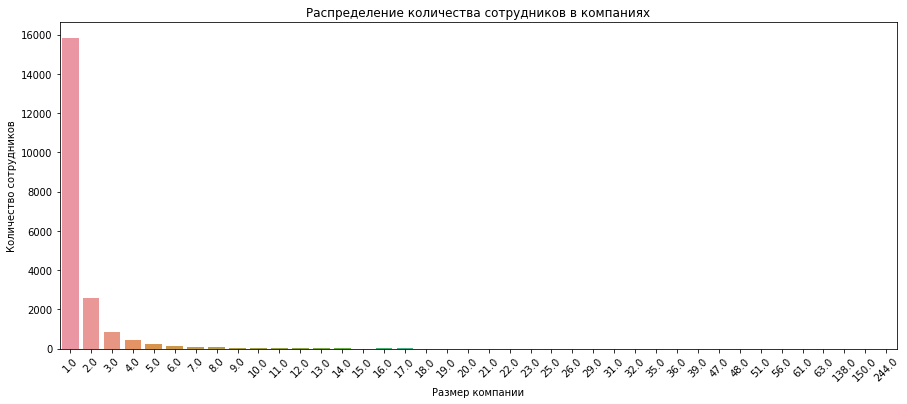

In [46]:
# Зададим размер фигуры
plt.figure(figsize=(15, 6))

# Построим countplot и посмотрим на распределение количества сотрудников
sns.countplot(x='company_size', data=people_df)

plt.title('Распределение количества сотрудников в компаниях')
plt.ylabel('Количество сотрудников')
plt.xlabel('Размер компании')

# Изменение угла поворота подписей на оси X
plt.xticks(rotation=45)

plt.show()
 

Видим, что наибольшее количество компаний представилены одним сотрудником.

In [47]:
# (v2)Разбиваем на категории с помощью pd.cut

bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

people_df['company_group'] = pd.cut(people_df['company_size'], bins=bins, labels=labels)

display(people_df['company_group'].head())
 

0      NaN
1        2
2        1
3        3
4    11-25
Name: company_group, dtype: category
Categories (7, object): ['1' < '2' < '3' < '4-5' < '6-10' < '11-25' < '26+']

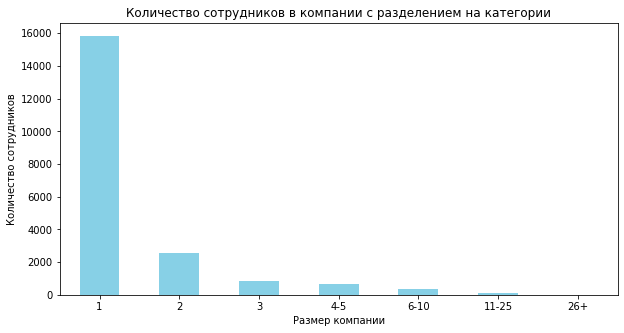

In [48]:
# Задаем размер графика
plt.figure(figsize=(10,5))

# Построим столбчатую диаграмму
people_df['company_group'].value_counts().plot(kind='bar',
                                               rot=0, 
                                               legend=False,
                                               color='#87D0E6',
                                               title=f'Количество сотрудников в компании с разделением на категории'
)

# Настраиваем оформление графика
plt.xlabel('Размер компании')
plt.ylabel('Количество сотрудников')

# Выводим график
plt.show()

### 2.3. Возможность объединения датасетов

1. Проверим уникальность значений: убедимся, что значения в столбце `network_username` уникальны для каждого сотрудника и не повторяются между разными датасетами. Если значения дублируются, это может указывать на то, что столбец не подходит для объединения данных без дополнительной обработки.
2. Сравним данные в столбце в разных датасетах: убедимся, что данные в столбце `network_username` означают одно и то же в разных датасетах и корректно идентифицируют пользователей.
3. Оценим количество дубликатов: если дубликаты присутствуют, оценим их количество и частоту. Это поможет понять, насколько серьёзно это повлияет на объединение данных.

Cтолбец `network_username`в встречается в следующих датасетах:
- датасет `company_and_rounds_df` - указанный столбец содержит информацию о нике компании в сети.
- датасет `people_df` — указанный столбец содержит информацию о нике в социальных сетях.
- дополнительная таблица `fund.csv` - указанный столбец содержит информацию о нике фонда в сети.

Посмотрим на уникальные значения столбца в разных датасетах. Начнем с датасета `company_df`.

In [49]:
a=company_and_rounds_df['network_username'].unique()
b=company_and_rounds_df['network_username'].nunique()

display(f'Уникальные значения: {a}')
display(f'Количество уникальных значений: {b}')

"Уникальные значения: ['BachelrWetpaint' nan 'Hostnine' ... 'networkzend' 'pPhotonet' 'Photonet']"

'Количество уникальных значений: 79571'

**Вывод:** уникальные значения столбцов требуют предварительной обработки, так как некоторые значения содержат опечатки, например 'pPhotonet' и 'Photonet', скорей всего это один и тотже ник.

Посмотрим на уникальные значения столбца в датасете `people_df`.

In [50]:
a=people_df['network_username'].unique()
b=people_df['network_username'].nunique()

display(f'Уникальные значения: {a}')
display(f'Количество уникальных значений: {b}')

"Уникальные значения: [nan 'jobsbostontech' 'fbroulette' ... 'itechsocialnet' 'socialnethubs'\n 'esocialnetlike']"

'Количество уникальных значений: 38421'

**Вывод:** стоит обратить на разный контекст уникальных значений между столбцом `network_username` в датасетах `people_df` и `company_df`. Уникальных значений меньшее количество, чем в датасете `company_df`.

Посмотрим на уникальные значения столбца в дополнительном таблице fund.csv.

In [51]:
# Выгрузим данные 
fund_df=pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

# Выведем уникальные значения и их количество
a=fund_df['network_username'].unique()
b=fund_df['network_username'].nunique()

display(f'Уникальные значения: {a}')
display(f'Количество уникальных значений: {b}')


"Уникальные значения: [nan 'greylockvc' 'imi_vc' ... 'CalSTRS' 'haystack_fund' 'fbFund']"

'Количество уникальных значений: 2098'

**Вывод:** также отметим разный контекст уникальных значений между столбцом `network_username` и меньшее количество таких значений по сравнени с датасетами `company_and_rounds_df` и `people_df`.

In [52]:
# Посмотрим на количество пропусков в столбце `network_username` датасета `company_df`

display('Количество пропусков в датасете company_and_rounds_df:')
display(company_and_rounds_df['network_username'].isna().sum())
display('Доля пропусков в датасете company_and_rounds_df:')
display(company_and_rounds_df['network_username'].isna().sum() / company_and_rounds_df['network_username'].shape[0]*100.0)

'Количество пропусков в датасете company_and_rounds_df:'

122240

'Доля пропусков в датасете company_and_rounds_df:'

56.13158595608291

Столбец содержит достаточно высокое количество пропущенных значений - более 56%, что может сделать данный столбце менее надеждый при объединении датасетов.

In [53]:
# Посмотрим на количество пропусков в столбце `network_username` датасета `people_df`

display('Количество пропусков в датасете people_df:')
display(people_df['network_username'].isna().sum())
display('Доля пропусков в датасете people_df:')
display(people_df['network_username'].isna().sum() / people_df['network_username'].shape[0]*100.0)

'Количество пропусков в датасете people_df:'

187842

'Доля пропусков в датасете people_df:'

82.85599601250942

Столбец содержит очень высокое количество пропущенных значений - более 82%, что делает данный столбец не подходящих для объдинения.

In [54]:
# Посмотрим на количество пропусков в столбце `network_username` датасета `fund_df`

display('Количество пропусков в датасете fund_df:')
display(fund_df['network_username'].isna().sum())
display('Доля пропусков в датасете fund_df:')
display(fund_df['network_username'].isna().sum() / fund_df['network_username'].shape[0]*100.0)

'Количество пропусков в датасете fund_df:'

9503

'Доля пропусков в датасете fund_df:'

81.55681428081016

Столбец содержит очень высокое количество пропущенных значений - более 81%, что делает данный столбец не подходящих для объдинения.

Посмотрим, повторяются ли названия ником для разных сотрудников. Оценим дубликаты в датасете `people_df` по двум столбцам `network_username` и `id`.

In [55]:
duplicates = people_df.duplicated(['id', 'network_username'])
a = duplicates.sum()

display(f'Количество дубликатов: {a}')

'Количество дубликатов: 1'

Посмотрим, повторяются ли названия ником для разных сотрудников. Оценим дубликаты в датасете `company_and_rounds_df` по двум столбцам `network_username` и `company_id`.

In [56]:
duplicates = company_and_rounds_df.duplicated(['company_id', 'network_username'])
a = duplicates.sum()

display(f'Количество дубликатов: {a}')

'Количество дубликатов: 124965'

Посмотрим, повторяются ли названия ником для разных сотрудников. Оценим дубликаты в датасете `company_df` по двум столбцам `network_username` и `id`.

In [57]:
duplicates = fund_df.duplicated(['id', 'network_username'])
a = duplicates.sum()

display(f'Количество дубликатов: {a}')

'Количество дубликатов: 0'

Для визуализации построим диаграмму Венна, которая показывает какие уникальные значения есть в каждом из датасетов, а также какие элементы являются общими, что поможет в оценке возможности объединения данных из разных источников, поскольку позволяет увидеть, насколько сильно они пересекаются или различаются по содержанию.

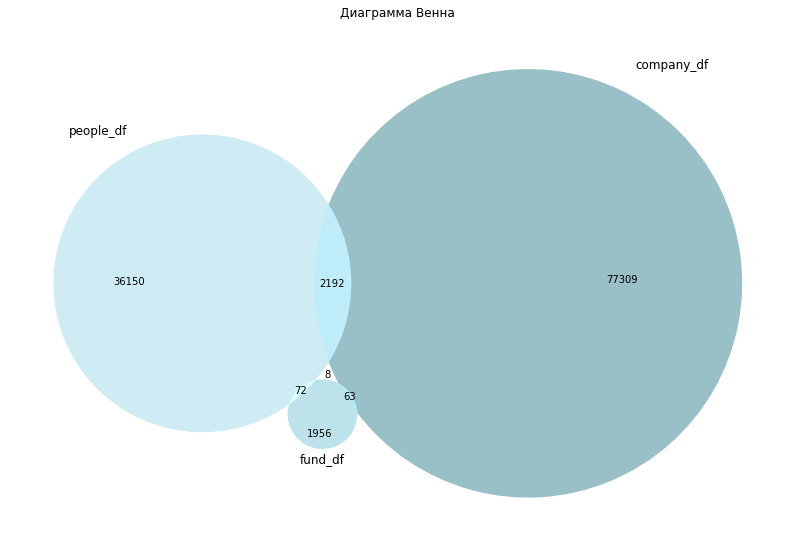

In [58]:
# Подготовим данные для диаграммы Венна
set_people = set(people_df['network_username'])
set_company = set(company_and_rounds_df['network_username'])
set_fund = set(fund_df['network_username'])

# Задаем цвета для каждого множества
set_colors = ['#87D0E6','#005F73','#5CB8D1']

# Создаем фигуру с указанным размером
plt.figure(figsize=(14, 14)) 

# Построим диаграмму Венна
venn3([set_people, set_company, set_fund], set_labels=('people_df', 'company_df', 'fund_df'), set_colors=set_colors)
plt.title('Диаграмма Венна')

plt.show()

**Общий вывод по анализу столбца `network_username`**:
1. Проверили уникальность значений: убедились, что значения в столбце `network_username` уникальны для каждого сотрудника и не повторяются между разными датасетами. Если значения дублируются, это может указывать на то, что столбец не подходит для объединения данных без дополнительной обработки.
Также выявили высокую долю пропущенных значений от 56% до 82%. Высокая доля пропущенных значений может привести к тому, что большое количество строк не будет объединено, или же объединение будет неполным и неточным.

2. Сравнили данные в столбце в разных датасетах: данные в столбце`network_username` с разным контектом:
- для датасета `company_and_rounds_df` - указанный столбец содержит информацию о нике компании в сети.
- для датасета `people_df` — указанный столбец содержит информацию о нике в социальных сетях.
- для датасета `fund_df` - указанный столбец содержит информацию о нике фонда в сети.
Эту информацию подтрвеждают уникальные значения, они содержат разной написание имен.

3. Оценили количество дубликатов: наибольшее количество дубликатов обнаружено в датасете `company_and_rounds_df` - 124965. В датасете `people_df` обнаружен 1 дубликат, в `fund_df` - они отсутствуют.

4. Диаграмма Венна показала:
- есть пересечениями между `people_df` и `company_and_rounds_df`, одновременно присутствуют 2192 значений, `company_and_rounds_df` и `fund_df` - 63, `fund_df`и `people_df` - 72.
- общее пересечение всех трёх множеств - 8.

Пересечений мало, следует рассмотреть альтернативные ключи для объединения, так как столбец `network_username` не подходит для прямого объединения данных из-за большой доли пропущенных значений, дубликатов и разного контекста.
    


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [59]:
# Выведем общую информацию о датасете
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   217472 non-null  object        
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    object        
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [60]:
# Изучим структуру
company_and_rounds_df.head()

,id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,years
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaN,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Выведем общую информацию о датасете
company_and_rounds_df.columns

Index(['id', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
       'domain', 'network_username', 'country_code', 'investment_rounds',
       'funding_rounds', 'funding_total', 'milestones', 'funding_round_id',
       'company_id', 'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round', 'years'],
      dtype='object')

На этапе знакомства с данным был переименован столбец из `company ID` в `id`. Также столбцы приведены к snakecase и заменены пробелы на `_` в названиях столбцов.

In [62]:
# Посмотрим на уникальные значения

a=company_and_rounds_df['id'].unique()
b=company_and_rounds_df['id'].nunique()

display(f'Уникальные значения: {a}')
display(f'Количество уникальных значений: {b}')

'Уникальные значения: [1.0 10.0 100.0 ... 174536.0 43233.0 nan]'

'Количество уникальных значений: 196553'

Подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций. Для этого создадим новый датасет с уникальными записями компаний.

In [63]:
#Делаем отдельную таблицу по компаниям
df_company = company_and_rounds_df[['id', 'name', 'category_code', 'status', 
                                    'founded_at', 'closed_at', 'domain', 
                                    'network_username', 'country_code', 
                                    'investment_rounds', 'funding_rounds', 
                                    'funding_total', 'milestones']]


#Убираем дубли записей
df_company = df_company.drop_duplicates(subset=['id', 'name', 'category_code', 'status', 
                             'founded_at', 'closed_at', 'domain', 
                             'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 
                            'funding_total', 'milestones'], keep='first')

In [64]:
df_company.columns

Index(['id', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
       'domain', 'network_username', 'country_code', 'investment_rounds',
       'funding_rounds', 'funding_total', 'milestones'],
      dtype='object')

In [65]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 196553 non-null  object        
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    object        
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(8)


Проверим датасет `df_company` на наличие полных явных дубликатов.

In [66]:
# Проверяем полные дубликаты в датасете
df_company.duplicated().sum()

0

После предобработки данных в датасете нет полных дубликатов строк

In [67]:
# Проверяем наличие дубликаты по столбцу с индификатором
df_company.duplicated(subset='id').sum()

0

In [68]:
# Делаем отдельную таблицу по раундам инвестирования
df_rounds = company_and_rounds_df[['company_id', 'raised_amount', 'funding_round_id', 
                            'funded_at', 'funding_round_type', 'pre_money_valuation', 
                            'participants', 'is_first_round', 
                            'is_last_round', 'years']]
# Cмотрим пропуски
display(df_rounds[df_rounds['funding_round_type'].isna()].head()) 

# Удаляем полные пропуски
df_rounds=df_rounds.dropna(subset=['funding_round_type'])

,company_id,raised_amount,funding_round_id,funded_at,funding_round_type,pre_money_valuation,participants,is_first_round,is_last_round,years
3,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52928 non-null  object        
 1   raised_amount        52928 non-null  float64       
 2   funding_round_id     52928 non-null  object        
 3   funded_at            52680 non-null  datetime64[ns]
 4   funding_round_type   52928 non-null  object        
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   years                52680 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 4.4+ MB


In [70]:
# Преобразуем тип данных в столбце `years` в тип данных `datetime64`
df_rounds['years']=pd.to_datetime(df_rounds['years'], errors='coerce')

# Проверим преобразования
df_rounds['years'].dtype

dtype('<M8[ns]')

Проверим датасет `df_rounds` на наличие полных явных дубликатов.

In [71]:
# Проверяем полные дубликаты в датасете
df_rounds.duplicated().sum()

0

In [72]:
# Проверяем наличие дубликаты по столбцу с индификатором
df_rounds.duplicated(subset='funding_round_id').sum()

0

После предобработки данных в датасете нет полных дубликатов строк.


## 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

In [ ]:
df_company.columns

Index(['id', 'name', 'category_code', 'status', 'founded_at', 'closed_at',
       'domain', 'network_username', 'country_code', 'investment_rounds',
       'funding_rounds', 'funding_total', 'milestones'],
      dtype='object')

In [ ]:
# Отфильтруем датасет по заданным условиям
df_company = df_company.loc[(df_company['funding_rounds'] > 0) 
                            | (df_company['investment_rounds'] > 0) 
                            | (df_company['status'] == 'acquired')]

# Выведем общую информацию
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 40747 non-null  object        
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   object        
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 4.

In [ ]:
display(df_company.head())

,id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaN,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaN,there.com,NaN,USA,0.0,0.0,0.0,4.0
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaN,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaN,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0


Посмотрим на количество и долю пропущенных значений.

In [ ]:
# Посчитаем количество пропущенных значений в датасете df_company
df_company.isna().sum()

id                       0
name                     0
category_code         5432
status                   0
founded_at           12940
closed_at            38619
domain                4993
network_username     19897
country_code          6005
investment_rounds        0
funding_rounds           0
funding_total            0
milestones               0
dtype: int64

In [ ]:
# Посчитаем долю пропущенных значений в датасете
df_company.isna().mean()

id                   0.000000
name                 0.000000
category_code        0.133310
status               0.000000
founded_at           0.317569
closed_at            0.947775
domain               0.122537
network_username     0.488306
country_code         0.147373
investment_rounds    0.000000
funding_rounds       0.000000
funding_total        0.000000
milestones           0.000000
dtype: float64

В результирующей таблице получилось 40 747 компаний.
Содержатся пропуски в столбцах: `category_code` - 13%, `founded_at` - 32%, `closed_at` - 95%, `domain` - 12%, `network_username` - 49%, `country_code` - 15%. Тип данных в столбце `closed_at` стоит преобразовать в тип данных `datetime` для коректной работы с датой и временем. В столбце `closed_at` пропуски вероятно не случайны, так как отсутствует информации означает, что компания еще действующая. В столбцах `category_code`, `founded_at`, `domain`, `country_code` на данном этапе заполнять не будем, оставим как есть.

In [ ]:
# Преобразуем тип данных в столбце closed_at
df_company.loc[:, 'closed_at'] = pd.to_datetime(df_company['closed_at'], errors='coerce')

In [ ]:
# Проверим преобразования
df_company.loc[:, 'closed_at'].dtype

dtype('<M8[ns]')

In [ ]:
# Проверяем количество значения в столбцах
for x in ['name', 'status', 'network_username']:
    display(f'Количество уникальных значений в столбце {x}:')
    display(df_company[x].sort_values().nunique())
    display()

'Количество уникальных значений в столбце name:'

40747

'Количество уникальных значений в столбце status:'

4

'Количество уникальных значений в столбце network_username:'

20661

Значения в столбце `name` приведем к нижнему регистру.

In [ ]:
# Приведем к нижнему регистру названия компаний в столбце name
df_company.loc[:, 'name'] = df_company['name'].str.lower()

# Проверим 4 случайные строки
df_company.sample(4,random_state = 172)

,id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
157557,332.0,billmonk,web,acquired,2005-09-01,NaT,billmonk.com,BillmonkFriends,USA,0.0,0.0,0.0,2.0
197848,68178.0,milk mantra,health,operating,NaT,NaT,milkmantra.com,NaN,IND,0.0,1.0,0.0,0.0
179233,51540.0,logic instrument,hardware,operating,1987-01-01,NaT,logic-instrument.com,Rugged_Hardware,FRA,0.0,1.0,1480000.0,0.0
142797,276774.0,justinvesting,finance,operating,NaT,NaT,justinvesting.com,NaN,NaN,0.0,1.0,1136440.0,2.0


В результате предобработки данных были выполнены следующие действия:

- Преобразован тип данных в столбце `closed_at` с `object` на `datetime`;
- Изучены пропуски в данных. Пропуски составляют от 12% до 95% столбцов, часть пропущенных значани можно обяснить.  Все пропуски оставили как есть.
- В столбце `name` наименования компаний приведены к нижнему регистру и содержатся только уникальные значения.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [82]:
filter = df_company['funding_total'] == 0.0
null_values = filter.sum()

display(f"Количество значений равных 0.0: {null_values}")

'Количество значений равных 0.0: 12873'

Построим гистограмму для `funding_total`, чтобы визуально определить распределение данных и выявить выбросы.

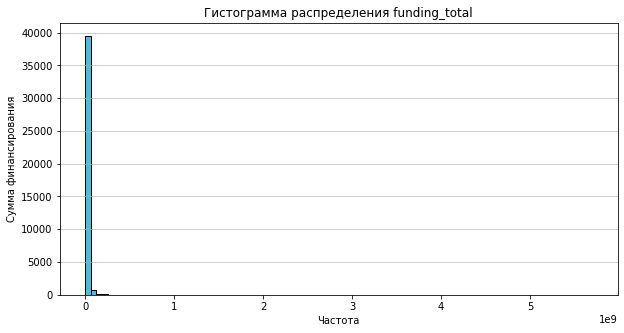

In [83]:
# Устанавливаем размер графика
plt.figure(figsize=(10, 5)) 

# Строим гистограмму
plt.hist(df_company['funding_total'], bins=90, color='#5CB8D1', edgecolor='black')

plt.title('Гистограмма распределения funding_total')
plt.xlabel('Частота')
plt.ylabel('Сумма финансирования')
plt.grid(axis='y', alpha=0.75)

plt.show()

На основании полученной гистограммы можно сделать следующие вывод:
- Гистограмма имеет один пик (унимодальное распределение), это может указывать на то, что большинство значений сосредоточено в определённом диапазоне.
- Данные имеют специфическое распределение или диапазон значений, который не позволяет корректно распределить данные по нескольким интервалам.
- Большинство значений очень близко друг к другу, гистограмма показывает только один значимый интервал или диапазон значений, который не позволяет корректно распределить данные по нескольким интервалам.

In [84]:
# Проверяем распределение данных по значениям столбца funding_total 0 и выше 
display('Распределение данных по значениям столбца funding_total 0 и выше:')
df_company.loc[df_company['funding_total'] >= 0]['funding_total'].value_counts() 

'Распределение данных по значениям столбца funding_total 0 и выше:'

0.0           12873
1000000.0       698
500000.0        523
100000.0        480
2000000.0       455
              ...  
11653200.0        1
1918090.0         1
1250200.0         1
2101770.0         1
3993020.0         1
Name: funding_total, Length: 9483, dtype: int64

Действительно, данных с суммой финансирования 0.0 значительно больше, чем с суммой от 100.000 до 2.000.000, остальные высокие значения представлены в единственном значении, можно отнести к выбросам, например, 11.653.200.

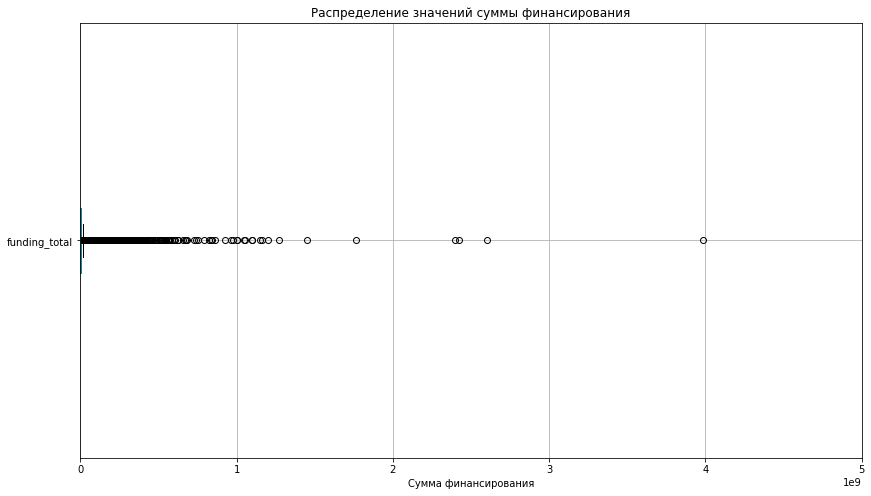

In [85]:
# Задаём размер графика
plt.figure(figsize=(14, 8))

# Строим диаграмму размаха значений в столбце funding_total
df_company.boxplot(column='funding_total', vert=False)


plt.xlim(0, 5000000000)


# Добавляем заголовок и метки оси
plt.title('Распределение значений суммы финансирования')
plt.xlabel('Сумма финансирования')

# Выводим график
plt.show() 

На диаграмме видны только выбросы и почти не видно «ящик» и «усы». Основные вывод на основании диаграммы размаха:
- Слишком большой разброс данных: данные имеют очень большой разброс или содержат много выбросов, это может привести к тому, что основной «ящик» становится незаметным из-за масштаба графика.
- В столбце funding_total могут содержатся аномальные значения
- Наблюдаются большое количество выбросов
- Большинство значнеий сосредоточены в значении 0
- К выбросам можно отнести значения свыше 1.400.000.

Чтобы лучше понять причину проблемы проверим описательные статистики для столбца funding_total.

In [86]:
df_company['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

На основании предоставленной описательной статистики можно сделать следующие выводы:
- Общее количество значений (count): в наборе данных 40.747 записей.
- Среднее значение (mean): среднее значение суммы финансирования составляет примерно 10.135.610. Это может дать представление о типичной сумме финансирования в вашем наборе данных.
- Стандартное отклонение (std): стандартное отклонение очень велико (564.643.600), что указывает на большой разброс значений относительно среднего.
- Минимальное значение (min): минимальная сумма финансирования равна 0, а максимальное значение (max): максимальная сумма финансирования составляет 5.700.000.000.

Квартили: 
- 25-й процентиль (Q1) равен 0, что означает, что 25% значений находятся ниже этого уровня.
- Медиана равна 600,000, что указывает на то, что половина значений находится ниже этого уровня, а половина — выше.
- 75-й процентиль равен 5.650.650, что означает, что 75% значений находятся ниже этого уровня.

Данные показывают, что распределение сумм финансирования сильно скошено вправо, с большим количеством малых значений и несколькими очень большими значениями, которые значительно увеличивают среднее значение и стандартное отклонение.


### 3.3. Продажи за ноль

Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и каким процентилям границы соответствуют.

Для начала объединим датасеты `df_company` и `acq_df`, который содержит информацию о сумме сделки.

In [87]:
# Объединяем датасеты через left
df_company_acq = pd.merge(df_company, acq_df, left_on='id', right_on='acquired_company_id', how='left')

display(df_company_acq.head())

,id_x,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id_y,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1,11,10,NaN,20000000.0,2007-05-30
2,100.0,there,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20,377,100,cash,0.0,2005-05-29
3,1001.0,friendfeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901,5,1001,cash_and_stock,47500000.0,2009-08-10
4,10014.0,mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878,23054,10014,NaN,0.0,2010-09-30


In [88]:
# Фильтруем объединённый датасет df_company_acq и оставляем сумму сделки за 0 и 1 доллар
# Добавляем условие, что funding_total должен быть больше нуля
filtered_df = df_company_acq[(df_company_acq['price_amount'] >= 0) & (df_company_acq['price_amount'] <= 1) & (df_company_acq['funding_total'] > 0)]

display(filtered_df.head())

,id_x,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id_y,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,10054.0,jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.0,7.0,121500000.0,3.0,9288,23283,10054,cash_and_stock,0.0,2013-08-13
63,101312.0,sidetour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.0,3.0,4000000.0,2.0,9653,11391,101312,NaN,0.0,2013-09-18
66,101340.0,choicepass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.0,1.0,250000.0,1.0,7272,1972,101340,NaN,0.0,2012-06-18
67,10137.0,producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.0,3.0,1310000.0,2.0,8254,757,10137,cash_and_stock,0.0,2012-11-05
68,10139.0,tradecard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.0,2.0,44925000.0,1.0,9326,44008,10139,NaN,0.0,2013-04-01


In [89]:
# Считаем сумму финансирования для каждой категории стартапа, купленные за 0 и 1 доллар с ненулевым общем объемом финансирования
groupby_sum = filtered_df.groupby('name')['funding_total'].sum().sort_values(ascending=False)

display(groupby_sum)

name
clearwire              5.700000e+09
fanatics               7.900000e+08
horizon wind energy    3.180000e+08
liberty dialysis       3.149600e+08
retailmenot, inc.      2.995000e+08
                           ...     
statsmix               1.200000e+04
divvyshot              1.000000e+04
open source food       1.000000e+04
gasbuddy               4.000000e+03
carefx                 3.750000e+03
Name: funding_total, Length: 1593, dtype: float64

Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total`.

In [90]:
# Вычисляем первый (Q1) и третий (Q3) квартили
Q1 = filtered_df['funding_total'].quantile(0.25)
Q3 = filtered_df['funding_total'].quantile(0.75)

# Рассчитываем IQR
IQR = Q3 - Q1

# Определяем границы выбросов
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

display(f'Нижняя граница выбросов: {lower}')
display(f'Верхняя граница выбросов: {upper}')

'Нижняя граница выбросов: -18250000.0'

'Верхняя граница выбросов: 35750000.0'

На основании полученных данных о границах выбросов можно сделать следующие выводы:

- Нижняя граница выбросов (-18,25 млн) показывает минимальное значение, которое можно считать выбросом в сторону меньших значений финансирования. Так как сумма финансирования не может быть отрицательной, это значение вероятно  указывает на особенности распределения данных или наличие аномалий в наборе данных, которые были обнаружены раннее.
- Верхняя граница выбросов (35,75 млн) определяет максимальное значение финансирования, после которого значения считаются выбросами в сторону больших значений. Это может помочь идентифицировать компании с необычно высоким уровнем финансирования по сравнению с остальными.

Дополнительно можно проанализировать есть ли у этих компаний какие-то общие характеристики или особенности, которые объясняют такие высокие или низкие значения финансирования.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Чтобы выделить категории стартапов с типично высокими ценами и наибольшим разбросом цен, можно проанализировать данные о ценах покупки стартапов в каждой категории `category code`: 

1. Анализ средних цен по категориям: рассчитаем среднюю цену покупки для каждой категории стартапов. Это поможет выявить категории с типично высокими ценами.
2. Анализ разброса цен: рассчитайем стандартное отклонение для каждой категории, которое покажет, в каких категориях наблюдается наибольший разброс цен.

Нулевые значения не исключаем, так как они важны для исследования и интерпретации результатов.

In [91]:
# Проанализируем средние цены и стандартное отлокнение по категориям
grouped = df_company.groupby('category_code')['funding_total'].agg(['median', 'std']).reset_index()

display(grouped)

,category_code,median,std
0,advertising,1000000.0,2.125720e+07
1,analytics,2000000.0,2.893465e+07
2,automotive,1300000.0,1.832047e+08
3,biotech,4000000.0,5.465791e+07
4,cleantech,6000000.0,9.215550e+07
5,consulting,50000.0,1.375791e+07
6,design,322745.0,8.862027e+06
7,ecommerce,486000.0,4.757703e+07
8,education,570000.0,3.660939e+07
9,enterprise,1617100.0,3.662222e+07


На основе представленных данных можно сделать следующие выводы:
1. Высокие медианы финансирования:
- В категории `semiconductor` средняя сумма финансирования составляет 8,1 млн, что является одним из самых высоких показателей.
- `cleantech` также демонстрирует высокий уровень финансирования — 6 млн.
2. Высокий уровень стандартного отклонения:
- В категории `automotive` (183,2 млн), что может указывать на значительные различия между стартапами в этом категории.
- Также высокое значение наблюдается `nanotech` и `manufacturing`, что говорит о разнообразии стартапов и их финансирования.
3. Низкие медианы и стандартные отклонения:
- Наиболее низкие средние суммы финансирования наблюдаются в секторах `transportation` (1,1 млн) и `fashion` (1,2 млн). Возможно связано с наименьшим количеством стартапов в данной области или ограниченными возможностями для привлечения средств.

In [92]:
# Выведем топ 15 категорий стартапов на основании высоких цен и с наибольшим разбросом цен
top_15 = grouped.sort_values(by='median', ascending=False).head(15)

display(top_15)

,category_code,median,std
35,semiconductor,8100000.0,3.992461e+07
4,cleantech,6000000.0,9.215550e+07
20,medical,5400000.0,3.354983e+07
24,nanotech,5115960.0,9.596109e+07
3,biotech,4000000.0,5.465791e+07
34,security,2024640.0,4.497966e+07
1,analytics,2000000.0,2.893465e+07
25,network_hosting,2000000.0,6.288838e+07
19,manufacturing,1895040.0,9.304530e+07
9,enterprise,1617100.0,3.662222e+07


Отсавим топ-15 именно из такого числа категорий на основании высоких цен, а также покажет, в каких областях стартапы обычно получают больше инвестиций, чтобы получить общее представление о наиболее привлекательных категориях стартапов для инвесторов.

Виузуализируем полученный топ-15 категорий стартапов по цене.

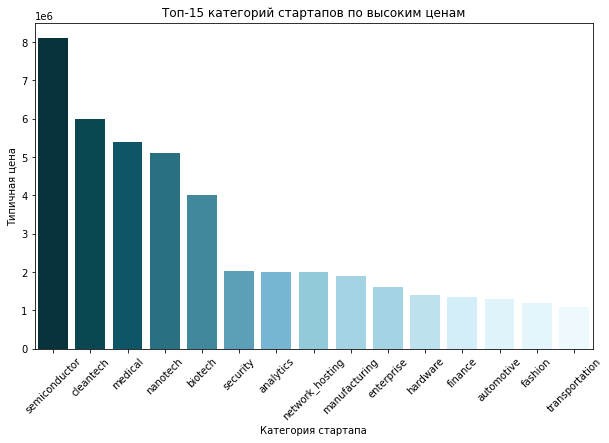

In [93]:
# Выведем в индекс названия категорий стартапов
top_15 = top_15.set_index('category_code')

# Задаём размер графика
plt.figure(figsize=(10, 6))

custom_palette = ['#003845', '#004F5B', '#005F73', '#1A7A90', '#3390AC', '#4DA6C7', '#66BCE3'
                  ,'#87D0E6', '#9AD9ED', '#9AD9ED', '#B6E5F7', '#CDF0FF', '#D9F7FF', '#E0F7FF'
                  ,'#EAFBFF', '#F3FEFF']

sns.barplot(x=top_15.index, y=top_15['median'], palette=custom_palette)

# Подписываем и отображаем график
plt.title('Топ-15 категорий стартапов по высоким ценам')
plt.xlabel('Категория стартапа')
plt.ylabel('Типичная цена')

plt.xticks(rotation=45)  # Поворачиваем метки по оси X для лучшего отображения


plt.show()

Таким образом, были выявлены топ-15 категорий стартапов по типично высоким ценам:

- Самый высокий показатель у semiconductor (более 8 млн)
- cleantech также демонстрирует высокий уровень финансирования (6 млн)
- medical и nanotech типично высокая цена составляет более 5,1 млн.

Но стоит обратить внимание, что среди данных категорий у `cleantech` и `nanotech` наиболее высокое значение стандратного отклонения, что такие категории наиболее высокорисковые для инвестиций, но в то же время обладают высокой вариативностью (какие-то стоят сильно дороже, какие-то сильно меньше).


### 3.5. Сколько раундов продержится стартап перед покупкой

- Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа. Проанализируем столбец `funding_rounds`. 
- Посмотрим сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [ ]:
# выведем количество уникальных значений
df_company['funding_rounds'].value_counts()

1.0     20534
0.0      9040
2.0      6142
3.0      2662
4.0      1216
5.0       600
6.0       249
7.0       147
8.0        67
9.0        46
10.0       23
11.0       10
13.0        5
12.0        3
15.0        2
14.0        1
Name: funding_rounds, dtype: int64

Наибольшее значение сосредоточено в пределах одного раунда. На втором месте распределено количество раундов 0, что может означать, что стартап не привлекал внешнее финансирование или данные о финансировании отсутствуют. Оставим данную информацию при анализе, так как предполагается представить общую картину, включая стартапы без раундов финансирования, что даст представление о среднем количестве раундов среди всех стартапов, включая те, которые не получили внешнего финансирования.

Для рассчета типичного значения количества раундов используем медианное значение.

In [95]:
df_company.groupby('status')['funding_rounds'].mean()

status
acquired     0.523526
closed       1.381453
ipo          1.934375
operating    1.522658
Name: funding_rounds, dtype: float64

На основании полученных данных о медиане по статусам стартапов можно сделать следующие выводы:
- Стартапы со статусом `acquired` имеют наименьшее среднее количество раундов финансирования - 0.5. Можно предположить, что многие из этих стартапов были приобретены на ранних стадиях развития или с минимальным количеством привлечённого внешнего финансирования.
- Стартапы в статусе `closed` имеют среднее количество раундов 1.4. Возможно, перед закрытием, привлекали некоторое количество финансирования, но всё равно завершили свою деятельность.
- Для статуса `ipo` среднее количество раундов составляет 1.9, что составляет наибольшее среднее значение по сравнению с другими статусами и можно сделать вывод, что обычно на данном этапе стартапа привлекают больше раундов финансирования по сравнению с другими.
- Стартапы со статусом `operating` имеют среднее количество раундов 1.5. Вероятно, что работающие стартапы привлекают несколько раундов финансирования для поддержания и развития своей деятельности.

Дополнительно посмотрим на среднее значение, исключив нулевые значения, чтобы посмотреть на значения, среди тех стартапов, которые успешно привлекли финансирование. Это позволит сосредоточиться на анализе финансируемых стартапов.


In [96]:
# Исключим значение раундов равное 0
filtered = df_company[df_company['funding_rounds'] != 0]

# Построим сводную
pivot_table = filtered.pivot_table(values='funding_rounds',
                                  index='status',
                                  aggfunc={'funding_rounds': ['median', 'mean']}).sort_values(by='mean', ascending=False)

display(pivot_table)


,mean,median
status,,
ipo,2.526531,2.0
acquired,1.896645,1.0
operating,1.642359,1.0
closed,1.383437,1.0


Среднее количество раундов финансирования для разных статусов стартапов:

- Для статуса `ipo` среднее количество раундов составляет 2.5. Это самый высокий показатель среди всех статусов, что может свидетельствовать о том, что стартапы, достигшие статуса `ipo`, привлекают больше раундов финансирования.
- Для `acquired` среднее количество раундов — 1.9. Это говорит о том, что приобретённые стартапы также часто привлекают несколько раундов финансирования перед сделкой.
- Для статуса `operating` — 1.6 ранудов, они имеют чуть меньше раундов финансирования по сравнению с приобретёнными стартапами.
- Наименьший показатель был выявлен для статуса `closed`— 1.4 раундов, что может указывать на то, что закрытые стартапы привлекают меньше раундов финансирования или не успевают привлечь дополнительное финансирование перед закрытием.

Что касается медианы:

- Для статусов `acquired`, `operating` и `closed` медиана равна 1, что означает, что половина стартапов в этих статусах имеет один или менее раундов финансирования, а половина — более одного раунда.
- Для статуса `ipo` медиана составляет 2, что говорит о том, что половина стартапов, достигших данного статуса, имеет два или более раундов финансирования.

Постром график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

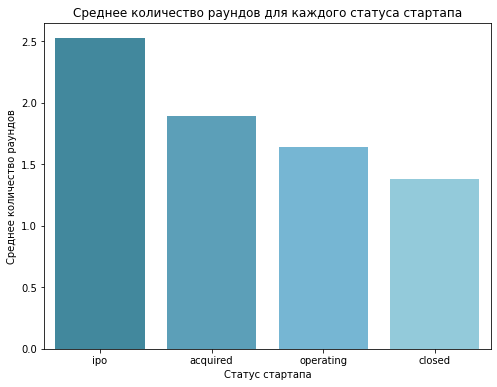

In [97]:
# Задаём размер графика
plt.figure(figsize=(8, 6))

custom_palette = ['#3390AC', '#4DA6C7', '#66BCE3','#87D0E6']

sns.barplot(x=pivot_table.index, y=pivot_table['mean'], palette=custom_palette)

# Подписываем и отображаем график
plt.title('Cреднее количество раундов для каждого статуса стартапа')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')


plt.show()

**Вывод:** 
- Самый высокий показатель среднего количества раундов финансирования для стартапов со статусом `ipo` - 2.5, могут быть наиболее привлекательны для инвесторов.
- Приобретенные стартапы в статуск `acquired` со средним количество раундов — 1.9, они привлекают несколько раундов финансирования.
- Наименьший показатель был выявлен для закрытых стартапов со статусом `closed`— 1.4, они привлекают меньше раундов финансирования или не успевают привлечь дополнительное финансирование перед закрытием.


## 4. Итоговый вывод и рекомендации

В ходе исследования проанализировали исторические данные компаний стартапов.

### Общая информация

Исследовательский анализ данных позволил сформировать общее представление о рынке стартапов и этапах финансировании:

- Были проанализированы исторические данные на основании 5 основных датасетов с информацией о покупках одними компаниями других компаний, о компаниях и раундах финансировании, о сотрудниках и их образовании.
- Данные были представлены значительной долей пропущенных, аномальных значений и выбросов. 
- По результатам предварительного анализа и предобработки был создан датасет из 40747 компаний.
- В 2013 году количество раундов и размер средств финансирования увеличивалось, наблюдается динамика на рост интереса к инвестициям, после периода спада.

### Размера компаний и информация об образовании

- Большинство компаний представлены с сотрудниками в количестве одного, что наиболее характерно для стартапов.
- По результатам проведенного анализа не наблюдается зависимость информации об образовании в зависимости от размера компнаа Доля сотрудников без информации об образовании в разных группах компаний по размеру довольно близка и колеблется примерно в пределах от 34% до 37%.
    
### Информация о финансировании
- Стандартное отклонение суммы финансирования очень велико, что указывает на большой разброс значений относительно среднего, что означает неравномерное распределений значений в наборе данных, наличие выбросов и аномальных значений и есть повод сомневаться в данных результатах.
-  Выявлен топ-15 стартапов по категорий по типично высоким ценам, среди них: самый высокий показатель средней типичной высокой ценой у категории semiconductor, затем cleantech (6 млн), medical и nanotech (более 5,1 млн). Наимеьшей показатель данного значения у категории transportation и fashion. Возможно, связано с наименьшим количеством стартапов в данной области или ограниченными возможностями для привлечения средств.


### Рекомендации

В качестве рекомендаций стоит обратить внимание на стартапы со статусом ipo, а также в категориях semiconductor, cleantech, medical и nanotech.
Дополнительно можно провести анализ аномальных значений и определить компании с необычно высоким уровнем финансирования по сравнению с остальными.